# Chapter 5: Numerical Differentiation


**Goal**: Given the function f(x), compute $\frac{d^nf}{dx^n}$ at a given $x$.

## Introduction

f is given as:
* A program, or:
* A finite number of (x,y) data pairs.

Methods to compute f' rely on:
* The Taylor expansion of f, or
* Interpolation of f

Note: numerical differentiation is not an accurate process, it is prone to roundoff errors caused by limited machine precision.

## Finite Difference Approximations

### [Taylor](https://en.wikipedia.org/wiki/Brook_Taylor) expansion

The forward and backward Taylor expansion of degree 4 of f(x) at $h$ is:
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + \mathcal{o}\left( h^4 \right) \quad \mathrm{\textbf{(a)}}\\
f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) +\mathcal{o}\left( h^4 \right) \quad \mathrm{\textbf{(b)}}
$$


### [Landau](https://en.wikipedia.org/wiki/Edmund_Landau) notations

#### Big-O
$$
f(x)=\mathcal{O}_{x=a}\left( g(x) \right) \Leftrightarrow lim_{x=a}\frac{f(x)}{g(x)} < \infty
$$

#### Little-O

$$
f(x)=\mathcal{o}_{x=a}\left( g(x) \right) \Leftrightarrow lim_{x=a}\frac{f(x)}{g(x)} = 0
$$
Note: Small-O implies Big-O

### Central Difference Approximations in $\mathcal{O}\left(h^2\right)$


#### Expressions of f' and f''

Equations (a) and (b) can be used to get a $\mathcal{O}\left(h^2 \right)$ approximation of $f'$ and $f''$:


$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}\left(h^2\right) \quad \textbf{(1)} 
$$

$$
f''(x) = \frac{f(x+h)+f(x-h)-2f(x)}{h^2} + \mathcal{O}\left(h^2\right) \quad \textbf{(2)} 
$$

Equations $\textbf{(1)}$ and $\textbf{(2)}$ are called *first central difference approximation for f' and f''*.

#### Expression of f''' and $f^{(4)}$

We need two more equations to compute f''' and $f^{(4)}$. These are provided by the forward and backward Taylor expansion of $f$ at $2h$:

$$
f(x+2h) = f(x) + 2hf'(x) + \frac{4h^2}{2!}f''(x) + \frac{8h^3}{3!}f'''(x) + \frac{16h^4}{4!}f^{(4)}(x) + o\left(h^4\right) \quad \mathrm{\textbf{(c)}}
$$
$$
f(x-2h) = f(x) - 2hf'(x) + \frac{4h^2}{2!}f''(x) - \frac{8h^3}{3!}f'''(x) + \frac{16h^4}{4!}f^{(4)}(x) + o\left(h^4\right) \quad \mathrm{\textbf{(d)}}
$$
And Equations $\textbf{(a)}$ and $\textbf{(b)}$ are still:
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + \mathcal{o}\left( h^4 \right) \quad \mathrm{\textbf{(a)}}\\
f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) +\mathcal{o}\left( h^4 \right) \quad \mathrm{\textbf{(b)}}
$$


By solving this system in $f'(x)$, $f''(x)$, $f'''(x)$ and $f^{(4)}(x)$, we obtain the first central difference approximations for f''' and $f^{(4)}$:
$$
f'''(x) = \frac{2f(x-h)+f(x+2h)-2f(x+h)-f(x-2h)}{2h^3} + \mathcal{O}\left( h^2 \right) \quad \textbf{(3)}
$$
$$
f^{(4)}(x) = \frac{f(x+2h)+f(x-2h)+6f(x)-4f(x-h)-4f(x+h)}{h^4} + \mathcal{O}\left( h^2 \right) \quad \textbf{(4)}
$$

#### Summary: coefficients of central difference approximations in $\mathcal{O}\left( h^2 \right)$ (for the exam, only the expression of f' and f'' are required)

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
              & f(x-2h) & f(x-h) & f(x) & f(x+h) & f(x+2h)\\
\hline
2hf'(x)       &         & -1     & 0    & 1      &   \\
\hline
h^2f''(x)     &         & 1      & -2   & 1      &  \\
\hline
2h^3f'''(x)   & -1      & 2      & 0    & -2   & 1 \\
\hline
h^4f^{(4)}(x) & 1       & -4     & 6    & -4   & 1 \\
\hline
\end{array}
$$

#### Example 5.1 (for x=0.2 only)

#### Error analysis

Equations $\textbf{(1)}$ to $\textbf{(4)}$ are hampered by the following trade-off:
1. When $h$ is large, $\mathcal{O}\left( h^2 \right)$ is also large $\rightarrow$ the *truncation* error is large.
2. When $h$ is small:
   * $f(x) \approx f(x+h) \approx f(x-h) \approx f(x+2h) \approx f(x-2h)$.
   * The nominator and denominator in Equations $\textbf{(1)}$ to $\textbf{(4)}$ are close to zero.
   * $\rightarrow$ the *roundoff* error is large.
   
Numerical derivation is not an accurate process!

#### Implementation

The implementation of equations Equations $\textbf{(1)}$ to $\textbf{(4)}$ is straightforward:

In [17]:
def f_1(f, x, h=10E-2):
    return (f(x+h)-f(x-h))/(2*h)

def f_2(f, x, h=10E-2):
    return (f(x+h)-2*f(x)+f(x-h))/h**2

def f_3(f, x, h=10E-2):
    return (f(x+2*h)-2*f(x+h)+2*f(x-h)-f(x-2*h))/(2*h**3)

def f_4(f, x, h=10E-2):
    return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/h**4

#### Illustration

$$
f(x) = e^x
$$

Small h ($\approx 10^{-9}$):

In [18]:
from math import exp
from numpy import zeros
from numpy import zeros, ones, arange
from math import exp

# We will compute f'(1) and f^(4)(1) for h, 2h, 3h, 4h, etc
n = 200
x = 1
incr_h = 10E-9
h = incr_h+incr_h*arange(n) # contains [h, 2h, 3h, etc]

# Computing f' and f(4) for h, 2h, 3h, etc
df = zeros(n) # Will contain f' values
ddddf = zeros(n) # Will contain f(4) values
for i in range(n):
    df[i] = f_1(exp, x, h[i])
    ddddf[i] = f_4(exp, x, h[i])

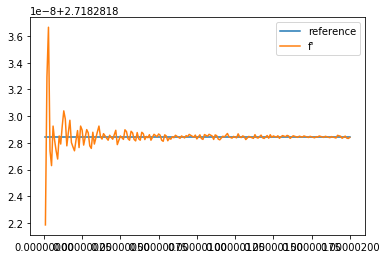

In [19]:
# Plotting f'
from matplotlib import pyplot as plt
from numpy import exp as exp_np
x_vals = ones(n)
plt.plot(h, exp_np(x_vals), h, df)
plt.legend(("reference", "f'"))
plt.show()

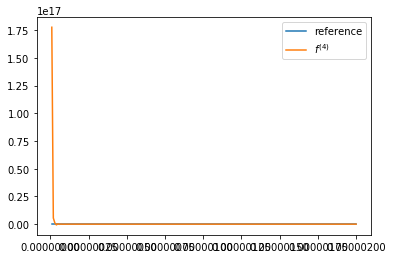

In [20]:
# Plotting f(4)

plt.plot(h, exp_np(x_vals), h, ddddf)
plt.legend(("reference", "$f^{(4)}$"))
plt.show()

Large h ($h \approx 10^{-4}$):

In [26]:
from numpy import zeros, ones, arange
from math import exp

# We will compute f'(1) and f^(4)(1) for h, 2h, 3h, 4h, etc
n = 200
x = 1
incr_h = 10E-4
h = incr_h+incr_h*arange(n) # contains [h, 2h, 3h, etc]

# Computing f' and f(4) for h, 2h, 3h, etc
df = zeros(n) # Will contain f' values
ddddf = zeros(n) # Will contain f(4) values
for i in range(n):
    df[i] = f_1(exp, x, h[i])
    ddddf[i] = f_4(exp, x, h[i])

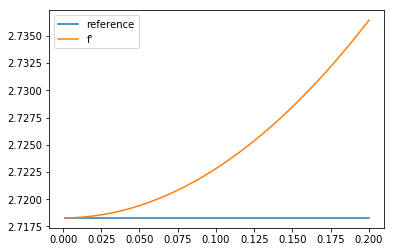

In [23]:
# Plotting f'
from matplotlib import pyplot as plt
from numpy import exp as exp_np
x_vals = ones(n)
plt.plot(h, exp_np(x_vals), h, df)
plt.legend(("reference", "f'"))
plt.show()

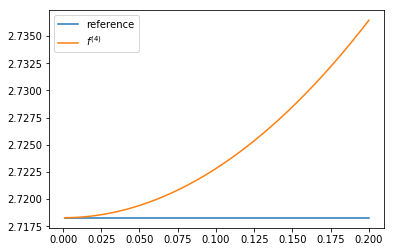

In [24]:
# Plotting f(4)

plt.plot(h, exp_np(x_vals), h, ddddf)
plt.legend(("reference", "$f^{(4)}$"))
plt.show()

### Non-central approximations

Central approximations are not always usable. For instance, if the function is given at $x_0$, ..., $x_n$, they cannot be used
to compute the derivatives at $x_0$ and $x_n$.

#### Approximation in $\mathcal{O}\left(h\right)$

The first *forward* approximation of f' is obtained from:

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \mathcal{o}\left( h^2 \right)
$$

which gives:

$$
f'(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}\left( h \right) \quad \textbf{(5)}
$$

Likewise, the first *backward* approximation of f' is obtained from:

$$
f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!} f''(x)+\mathcal{o}\left( h^2 \right)
$$

which gives:

$$
f'(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{O}\left( h \right)
$$

#### Error analysis

Approximations in $\mathcal{O}\left(h\right)$ are not accurate, as illustrated below.

In [27]:
def first_forward(f, x, h):
    return (f(x+h)-f(x))/h

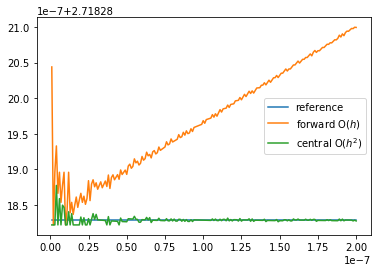

In [28]:
from numpy import zeros, ones, arange
from math import exp
from numpy import exp as exp_np

# We will compute f'(1) for h, 2h, 3h, 4h, etc
n = 200
x = 1
incr_h = 10E-10
h = incr_h+incr_h*arange(n)
df = zeros(n) # will store the forward approx in O(h)
df_cent = zeros(n) # will store the central approx in O(h^2)
for i in range(n):
    df[i] = first_forward(exp, x, h[i])
    df_cent[i] = f_1(exp, x, h[i]) # central approximation

    
from matplotlib import pyplot as plt
plt.plot(h, exp_np(x_vals), h, df, h, df_cent)
plt.legend(('reference', 'forward O($h$)', 'central O($h^2$)'))
plt.show()

#### Approximation in $\mathcal{O}\left(h^2\right)$

First-order approximations are not accurate. Instead, the second-order *forward* approximation of $f'$ can be obtained from the following equations:

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + o\left(h^3\right)
$$

$$
f(x+2h) = f(x) + 2hf'(x) + \frac{4h^2}{2!}f''(x) -  \frac{8h^3}{3!}f'''(x) + o\left(h^3\right)
$$


It gives:
$$
f'(x) = \frac{-3f(x)+4f(x+h)-f(x+2h)}{2h} +\mathcal{O}\left(h^2\right) \quad \textbf{(6)}
$$

Forward approximations of $f''(x)$ uses Taylor expansions of $f(x+3h)$, $f'''(x)$ uses $f(x+4h)$, etc.

Equation $\textbf{(6)}$ is much more accurate than Equation $\textbf{(5)}$, as illustrated below:

In [11]:
def second_forward(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

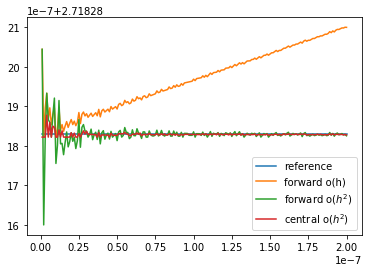

In [12]:
from numpy import zeros, ones, arange
from math import exp
n = 200
x = 1
incr_h = 10E-10
h = incr_h+incr_h*arange(n)
f = ones(n)*exp(x)
df = zeros(n)
df_cent = zeros(n)
df_second = zeros(n)
for i in range(n):
    df[i] = first_forward(exp, x, h[i]) # o(h) forward approximation
    df_second[i] = second_forward(exp, x, h[i]) # o(h**2) forward approximation
    df_cent[i] = f_1(exp, x, h[i]) # central approximation
    
from matplotlib import pyplot as plt
plt.plot(h, f, h, df, h, df_second, h, df_cent)
plt.legend(('reference', 'forward o(h)', 'forward o($h^2$)', 'central o($h^2$)'))
plt.show()

### Example (in class)

Example 5.1 in textbook.

## [Richardson](https://en.wikipedia.org/wiki/Lewis_Fry_Richardson) Extrapolation

Richardson extrapolation is a way to *boost numerical accuracy*.

Suppose that we have some quantity G that we can estimate using parameter $h$ with error $e$:
$$
G = g(h) + e(h)
$$
Richardson extrapolation assumes that the error is in the form $e(h)=ch^p$, with c and p constants.

We compute $G$ with two values of h, $h_1$ and $h_2$:

$$
G = g(h_1) + ch_1^p
$$
$$
G = g(h_2) + ch_2^p
$$


From the first equation, we get:
$$
c= \frac{G-g(h_1)}{h_1^p}
$$
which gives, in the second equation:
$$
G = \frac{h_1^pg(h_2)-h_2^2g(h_1)}{h_1^p-h_2^p}
$$

### Example (in class)

Richardson extrapolation for $\mathcal{O}(n)$ approximation of $f'(x)=e^x$ at x=1, with $h_1=0.1$ and $h_2=0.2$.

## Derivatives by interpolation

Main idea:
* Interpolate f(x) by P(x)
* Approximate f'(x) by P'(x)

Useful when:
* f(x) is given as a set of discrete points
* Points are located at uneven intervals of x (finite differences are not applicable)

### Polynomial interpolant

Find *the* polynomial $P_n$ of degree $n$ that passes through $n+1$ points:
* See [Chapter 3](Chapter3.ipynb)
* **Warning**: polynomials of high degree tend to oscillate:
    * Limit degree to 6
    * Use local interpolation 

Interpolation methods seen in Chapter 3:
* Lagrange 
* Newton

$\rightarrow$ Don't provide directly the coefficients of the interpolant.

Two options in practice: (1) least-square fit of polynomial, (2) direct interpolation.

#### Least-square fit of $n+1$ points with polynomial of degree $m$ (skipped)

* Does interpolation when $m$ = $n$
* Robust to noisy data when $m < n$
* Coefficients of the polynomial obtained by solving $\textbf{Ax}$=$\textbf{b}$, where:
$$
A_{kj} = \sum_{i=0}^n x_i^{j+k} \quad \quad b_k = \sum_{i=0}^n x_i^ky_i
$$

#### Direct interpolation

Solve linear equations, as in Assignment 1:
$$
y_0 = P_n(x_0)\\
y_1 = P_n(x_1) \\
\ldots\\
y_n = P_n(x_n)
$$

#### Example

5.4 in textbook (#1)

(Stopped lecture here)

#### Implementation

In [13]:
### FROM CHAPTER 3
from numpy import array
def polynomial_fit(x_data, y_data, m):
    '''
    Returns the ai
    '''
    # x_power[i] will contain sum_i x_i^k, k = 0, 2m
    m += 1
    x_powers = zeros(2*m)
    b = zeros(m)
    for i in range(2*m):
        x_powers[i] = sum(x_data**i)
        if i < m:
            b[i] = sum(y_data*x_data**i)
    a = zeros((m, m))
    for k in range(m):
        for j in range(m):
            a[k, j] = x_powers[j+k]
    from numpy.linalg import solve # using linalg for brevity here, but we could use the solvers developed in Chap 2.
    return solve(a, b)

### FROM CHAPTER 4
def eval_p(a, x):
    '''
    Returns P(x) where the coefficients of P are in a
    '''
    n = len(a)
    p = a[n-1]
    for i in range(2, n+1):
        p = a[n-i] + x*p
    return p

In [14]:
def df_interpol(x_data, y_data):
    n = len(x_data) - 1
    coeffs = polynomial_fit(x_data, y_data, n)
    d_coeffs = zeros(n)
    for i in range(n):
        d_coeffs[i] = (i+1)*coeffs[i+1] # differentiation from coefficients
    return d_coeffs

#### Example

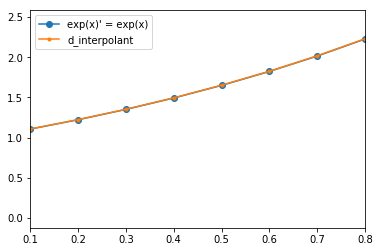

In [15]:
from numpy import zeros, ones, arange, cos, sin, exp
from math import exp as exp_m
n = 10
x_data = arange(n)/n # 0, 1/n, 2/n, ..., (n-1)/n 
y_data = exp(x_data) # exp' = exp
df_poly = zeros(n)
poly = zeros(n)
for i in range(1, n-1):
    # Interpolation with the 3 nearest neighbours
    df_coeffs = df_interpol(x_data[i-1:i+2], y_data[i-1:i+2])
    df_poly[i] = eval_p(df_coeffs, x_data[i]) #Approx by polynomial interpolation
    
from matplotlib import pyplot as plt
plt.plot(x_data, y_data, '-o',
         x_data, df_poly, '.-'
        )
plt.legend(("exp(x)' = exp(x)",
            'd_interpolant'))
plt.xlim(x_data[1], x_data[n-2])
plt.show()

### Cubic spline interpolant

* Cubic splines are good interpolants due to their stiffness.
* They are also easy to differentiate.

From Equation $\textbf{(0)}$ in [Chapter 3](Chapter3.ipynb), we get:

$$
\forall x \in [x_i, x_{i+1}], \quad \quad
f'(x) = \frac{z_i}{6}\left[ \frac{3(x-x_{i+1})^2}{x_i-x_{i+1}} - (x_i-x_{i+1}) \right]
        - \frac{z_{i+1}}{6}\left[ \frac{3(x-x_i)^2}{x_i-x_{i+1}} - (x_i-x_{i+1}) \right] + \frac{y_i-y_{i+1}}{x_i-x_{i+1}}
$$
where $z_i$ are the curvatures returned by function 

Likewise:
    
$$
\forall x \in [x_i, x_{i+1}], \quad \quad
f_i''(x)=z_{i+1}\frac{x-x_i}{x_{i+1}-x_i}+z_i\frac{x_{i+1}-x}{x_{i+1}-x_i}
$$

#### Implementation

In [16]:
# From Chapter 2:
# Tridiagonal system solver

def tridiag_decomp(c, d, e):
    assert(len(c) == len(d) == len(e))
    n = len(c)
    for k in range(1, n):
        lambd = c[k-1]/d[k-1]
        d[k] -= lambd*e[k-1]
        c[k-1] = lambd
        
from numpy import zeros
def tridiag_solve(c, d, e, b): # watch out, input has to be in LU form!
    assert(len(c) == len(d) == len(e) == len(b))
    n = len(c)
    # forward substitution
    for i in range(1, n):
        b[i] = b[i]-c[i-1]*b[i-1] # Here we use b to store y
    # back substitution
    b[n-1] = b[n-1]/d[n-1] # Here we use b to store x
    for i in range (n-2, -1, -1):
        b[i] = (b[i]-e[i]*b[i+1])/d[i]

def tridiag_solver(c, d, e, b): # complete solver for tridiagonal systems
    tridiag_decomp(c, d, e)
    tridiag_solve(c, d, e, b)
    
# FROM CHAPTER 3
def curvatures(x, y):
    '''
    Returns the zi
    '''
    assert(len(x)==len(y))
    n = len(x) - 1
    # Initialize arrays
    h = zeros(n)
    b = zeros(n)
    u = zeros(n)
    v = zeros(n)
    # Compute array values
    # Be careful, indexing of u and v is shifted (u[0] and v[0] aren't defined)
    for i in range(n):
        h[i] = x[i+1] - x[i]
        b[i] = (y[i+1] - y[i])/h[i]
        if i == 0 :
            continue
        u[i] = 2*(h[i-1]+h[i])
        v[i] = 6*(b[i]-b[i-1])
    e = h.copy() # copy h in e, since the solver will modify the lower diagnoal (c)
    # Careful with indexing: h0 doesn't show in the system
    tridiag_solver(h[1:n], u[1:n], e[1:n], v[1:n]) # as in Chapter 2!
    z = zeros(n+1)
    z[1:n] = v[1:n]
    return z

def find_segment(x, x_eval):
        '''
        Finds i  such that x[i] <= x_eval <= x[i+1]
        By dichotomic search
        '''
        i = 0
        j = len(x) - 1 # = n
        assert(x_eval <= x[-1])
        while not (x[i] <= x_eval and x_eval <= x[i+1]):
            k = int((i+j)/2)
            if x_eval > x[k]:
                i = k
            else:
                j = k
        return i

#### Example

5.4 in textbook (#2)